<a href="https://colab.research.google.com/github/Ayisha-Parveen/Projects/blob/main/Predicting_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.0 MB/s 
     |████████████████████████████████| 133 kB 48.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5697a4ec6af917b9be8f61c28199e83ca3111a339b9723c84a15538d670339e4
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import math
from geopy.geocoders import Nominatim
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [ ]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

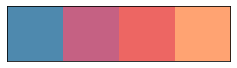

In [ ]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

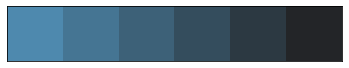

In [ ]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

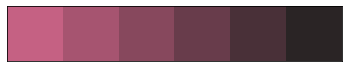

In [ ]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

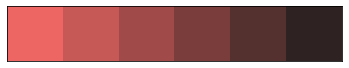

In [ ]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

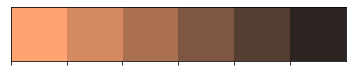

In [ ]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=1)

In [ ]:
df1 = pd.read_csv('/content/Mumbai.csv')
df2 = pd.read_csv('/content/Delhi.csv')
df3 = pd.read_csv('/content/Chennai.csv')
df4 = pd.read_csv('/content/Hyderabad.csv')

Since for a set of houses, nothing was mentioned about certain amenities, '9' was used to mark such values, which could indicate the absence of information about the apartment but these values don't ascertain the absence of such a feature in real life.

We will be dropping these values so that they don't cloud our analysis.

In [ ]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)

In [ ]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

In [ ]:
print(f"{y_}Mumbai:{r_}{df1.shape}\n")
print(f"{y_}Delhi:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")

Mumbai:(1398, 40)

Delhi:(2002, 40)

Chennai:(2233, 40)

Hyderabad:(2434, 40)



In [ ]:
print(f"{y_}Data types of data columns: \n{m_}{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

Modifying price to price in lakhs(INR)

In [ ]:
df1['Price'] = df1['Price']/100000
df2['Price'] = df2['Price']/100000
df3['Price'] = df3['Price']/100000
df4['Price'] = df4['Price']/100000

In [ ]:
geolocator = Nominatim(user_agent="Ruch")

def feature_generation(df):
    lat=[]
    long=[]
    a=0
    for i in df['Location']: 
        location = geolocator.geocode(i, timeout=1000000)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            #print(a)
        except:
            lat.append("NA")
            long.append("NA")
        a=a+1
    df['Latitude'] = lat
    df['Longitude'] = long

In [ ]:
feature_generation(df1)
feature_generation(df2)
feature_generation(df3)
feature_generation(df4)

In [ ]:
df1.to_csv('D:\GLIM\ES\archive\Mumbai_updated.csv')
df2.to_csv('D:\GLIM\ES\archive\Delhi_updated.csv')
df3.to_csv('D:\GLIM\ES\archive\Chennai_updated.csv')
df4.to_csv('D:\GLIM\ES\archive\Hyderabad_updated.csv')

In [ ]:
from google.colab import files
files.download('D:\GLIM\ES\archive\Mumbai_updated.csv')
files.download('D:\GLIM\ES\archive\Delhi_updated.csv')
files.download('D:\GLIM\ES\archive\Chennai_updated.csv')
files.download('D:\GLIM\ES\archive\Hyderabad_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1 = pd.read_csv('/content/Chennai_updated.csv')
df2 = pd.read_csv('/content/Delhi_updated.csv')
df3 = pd.read_csv('/content/Hyderabad_updated.csv')
df4 = pd.read_csv('/content/Mumbai_updated.csv')

In [ ]:
df1 = df1.drop(['Unnamed: 0'], axis = 1) 
df2 = df2.drop(['Unnamed: 0'], axis = 1) 
df3 = df3.drop(['Unnamed: 0'], axis = 1) 
df4 = df4.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()

In [ ]:
print("Skewness value for Mumbai is : ", + df1['Price'].skew())
print("Skewness value for Delhi is : ", + df2['Price'].skew())
print("Skewness value for Chennai is : ", + df3['Price'].skew())
print("Skewness value for Hyderabad is : ", + df4['Price'].skew())

Skewness value for Mumbai is :  6.884928254279285
Skewness value for Delhi is :  4.595624789245371
Skewness value for Chennai is :  4.531942737362612
Skewness value for Hyderabad is :  9.151690685168724


In [ ]:
print(f"{y_}Mumbai:{r_}{df1.shape}\n")
print(f"{y_}Delhi:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")

Mumbai:(2052, 42)

Delhi:(1965, 42)

Chennai:(2224, 42)

Hyderabad:(1283, 42)



In [ ]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


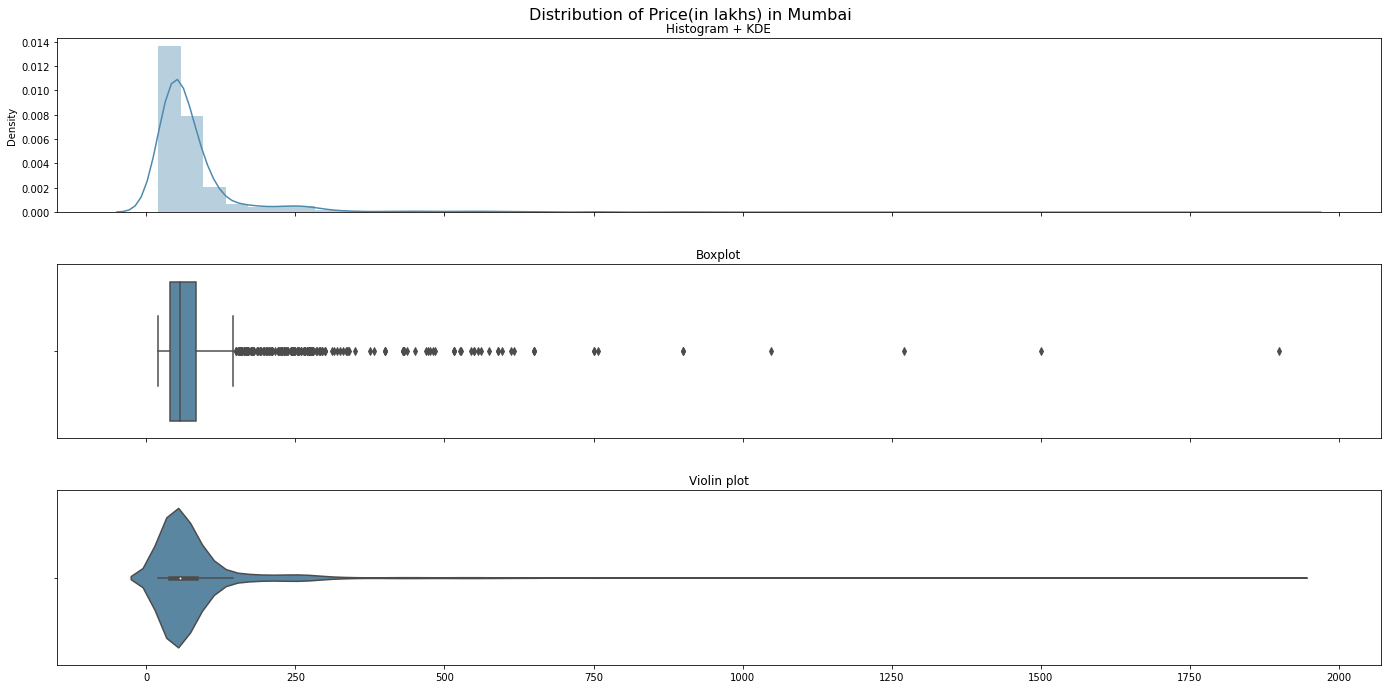

In [ ]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


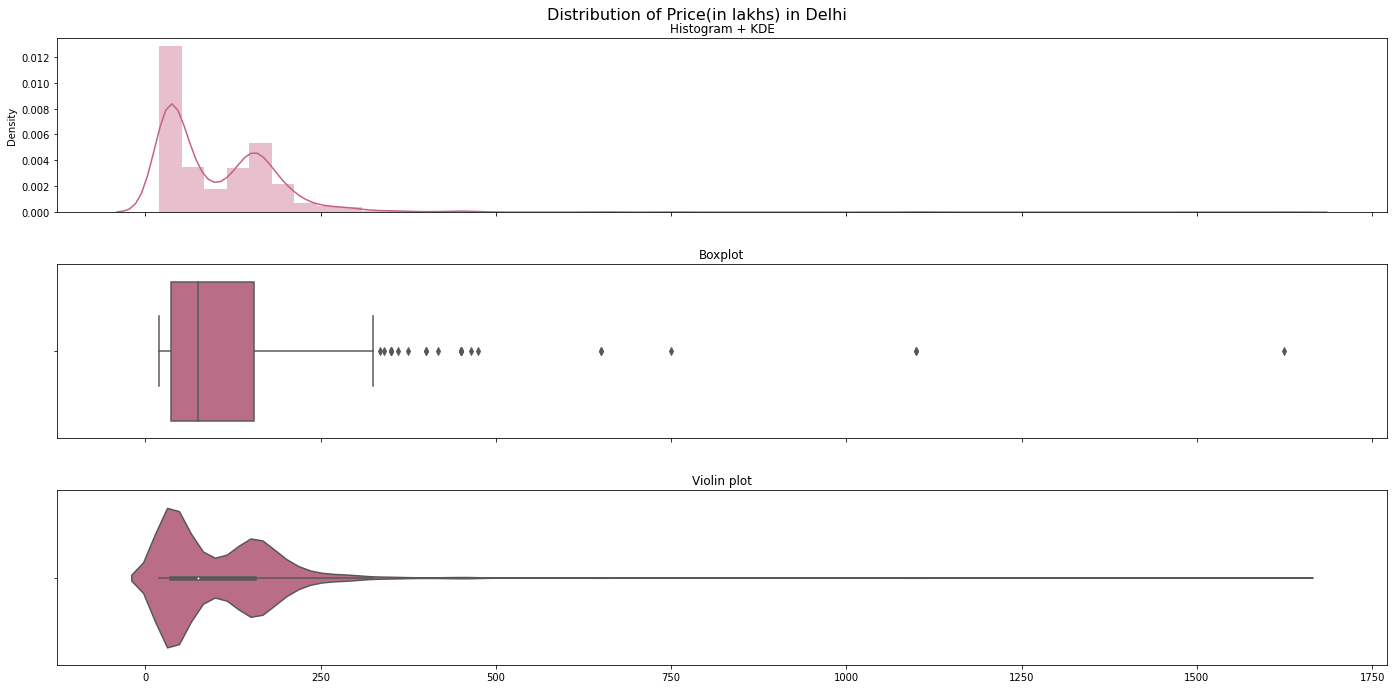

In [ ]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


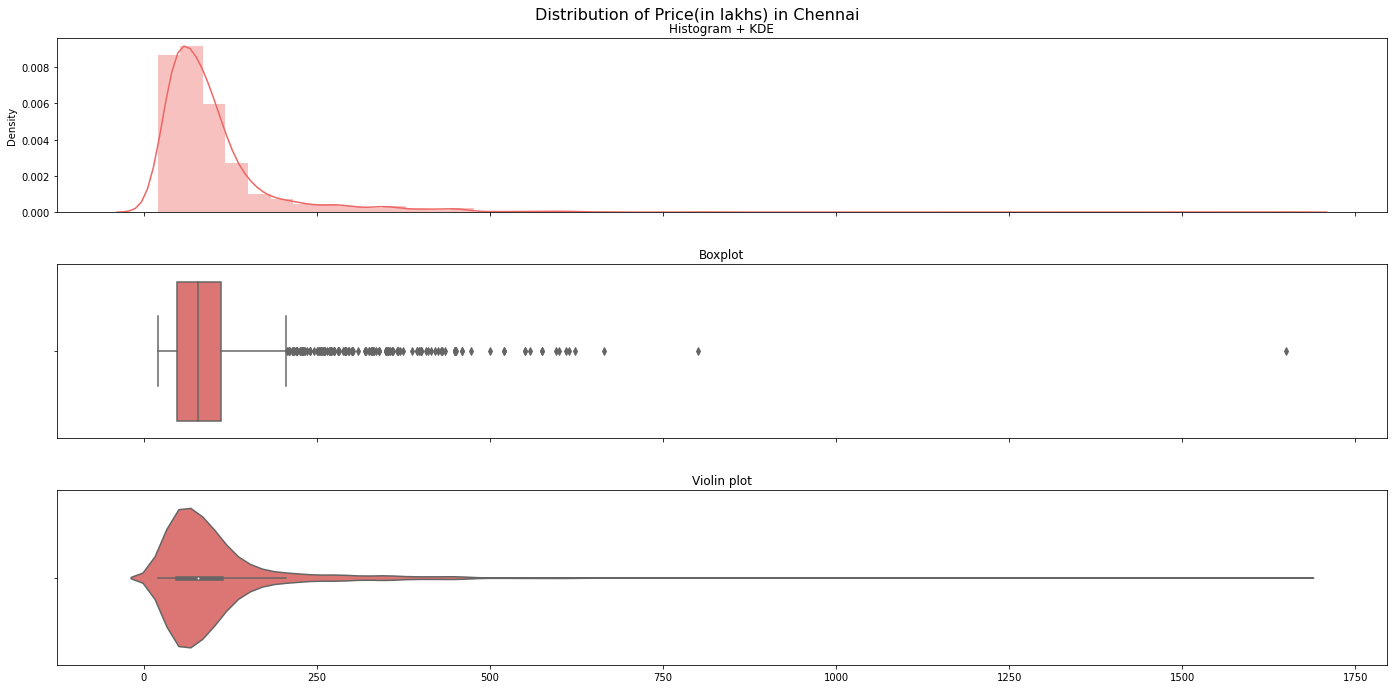

In [ ]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Chennai',custom_colors[2])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


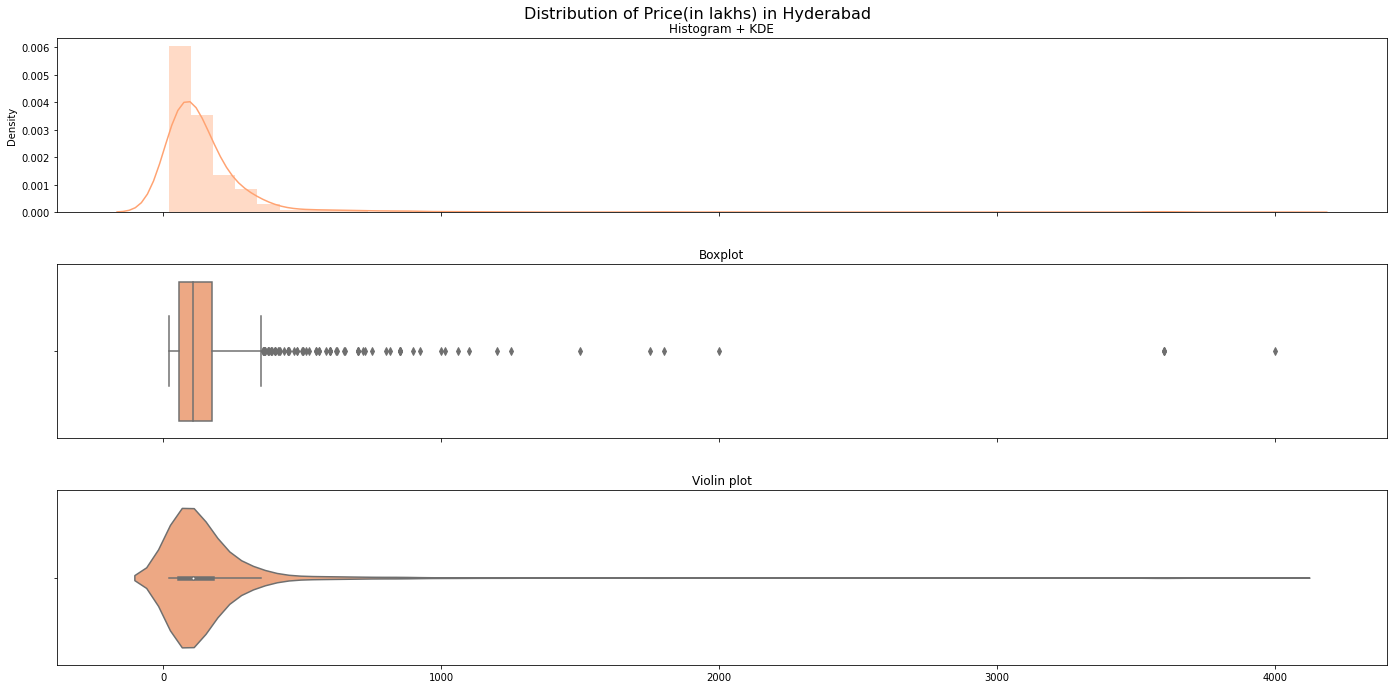

In [ ]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Hyderabad',custom_colors[3])

In [ ]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

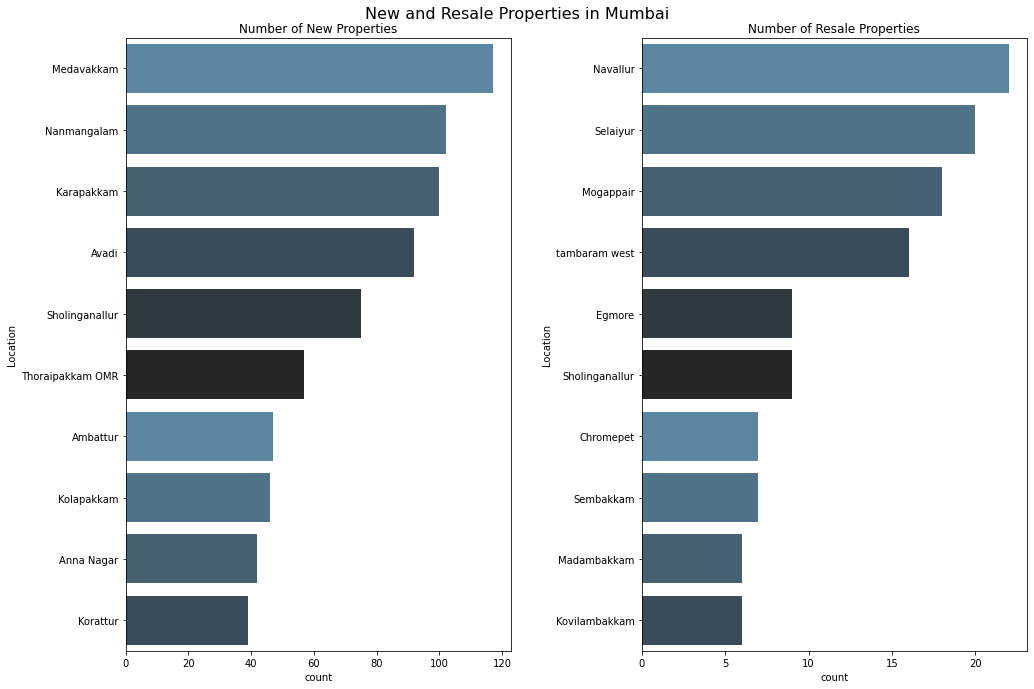

In [ ]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

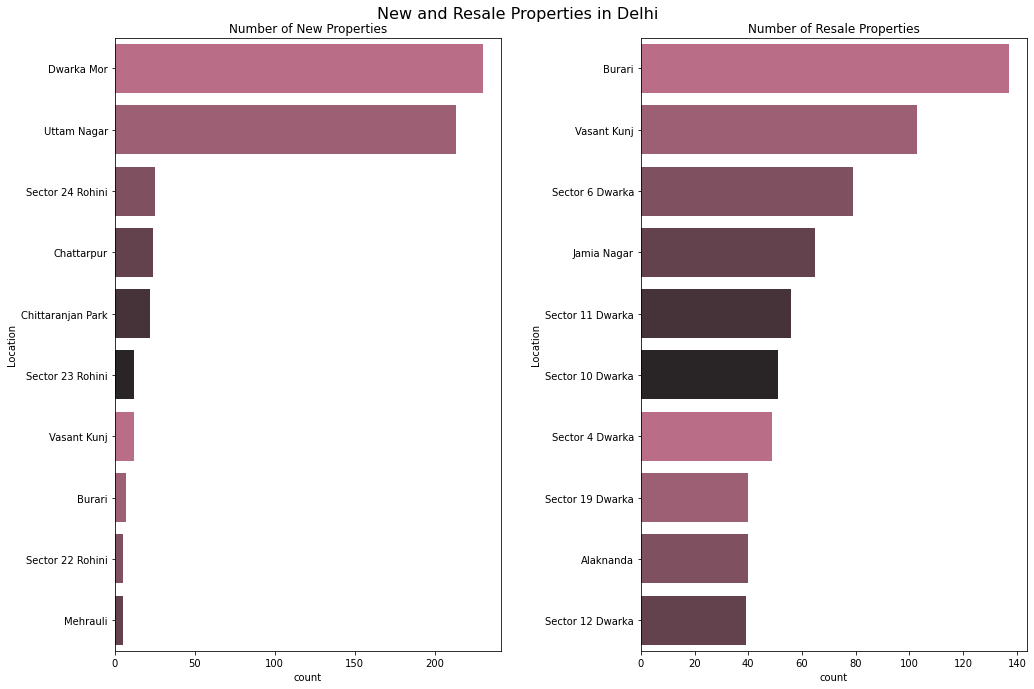

In [ ]:
count_plot(df2,'New and Resale Properties in Delhi',delhi)

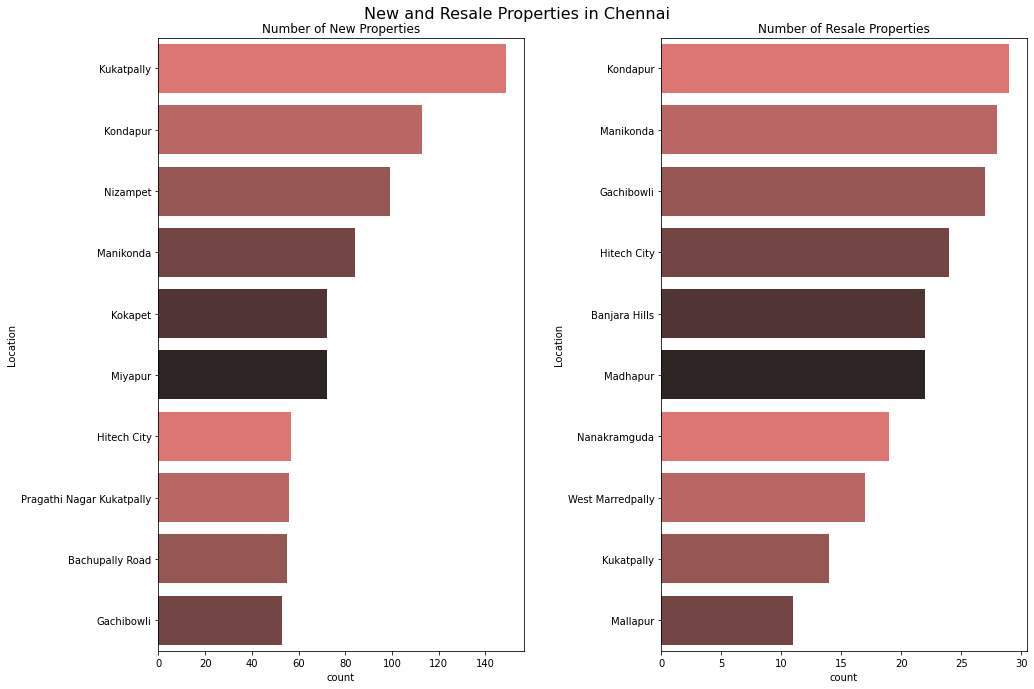

In [ ]:
count_plot(df3,'New and Resale Properties in Chennai',chennai)

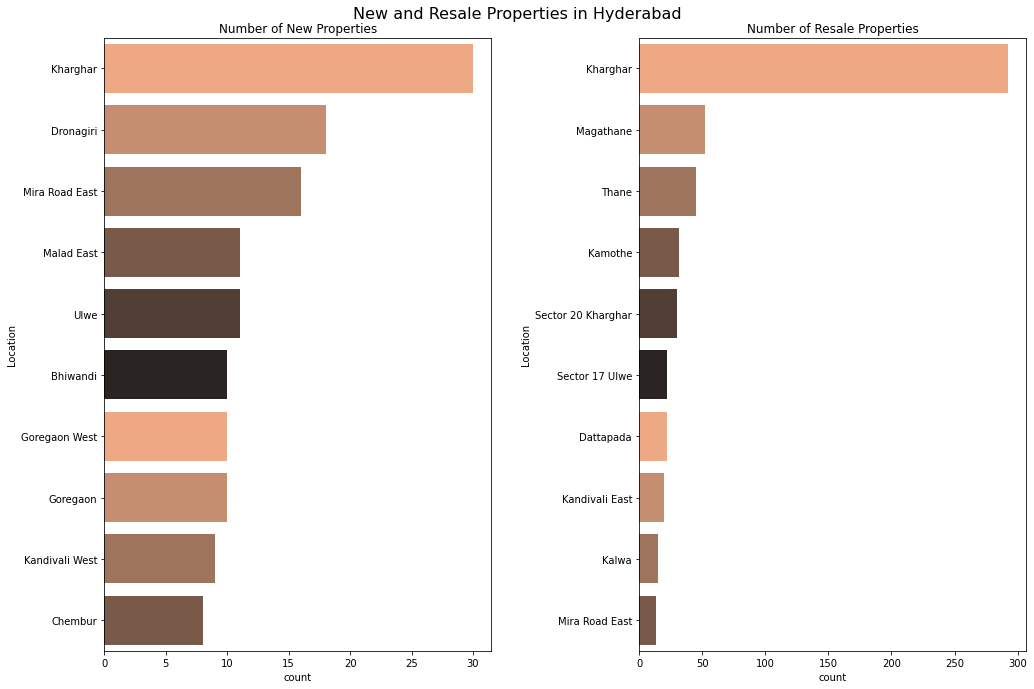

In [ ]:
count_plot(df4,'New and Resale Properties in Hyderabad',hyderabad)

In [ ]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

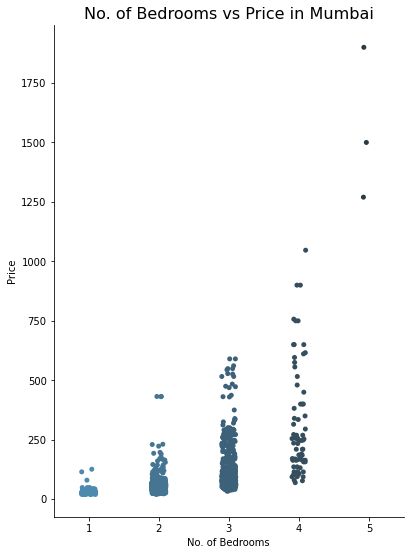

In [ ]:
cat_plot(df1,'Mumbai',mumbai)

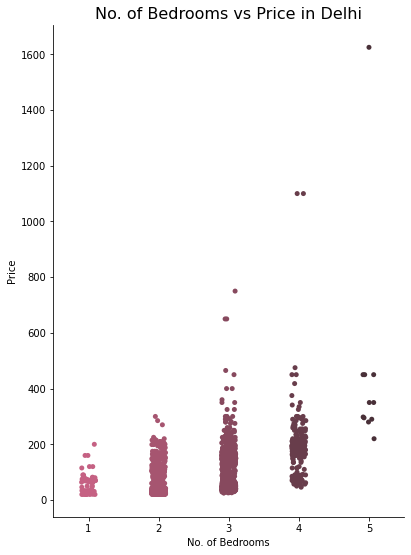

In [ ]:
cat_plot(df2,'Delhi',delhi)

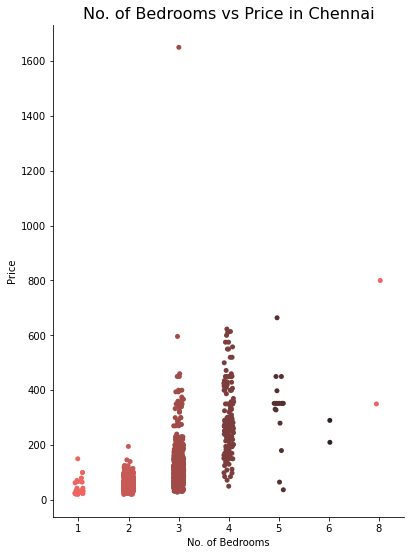

In [ ]:
cat_plot(df3,'Chennai',chennai)

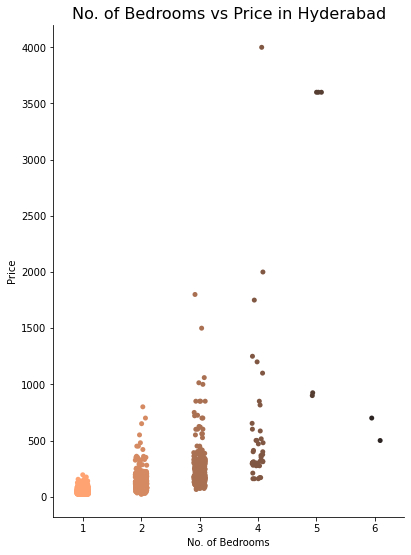

In [ ]:
cat_plot(df4,'Hyderabad',hyderabad)

In [ ]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

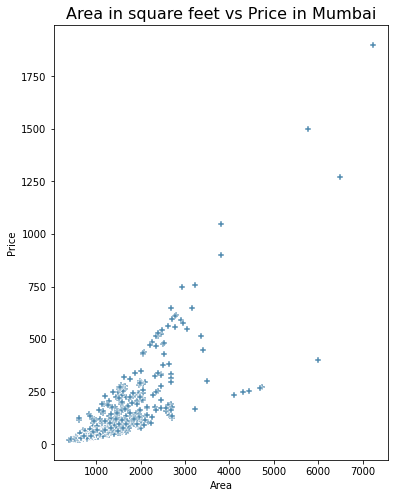

In [ ]:
scatter_plot(df1,'Mumbai',custom_colors[0])

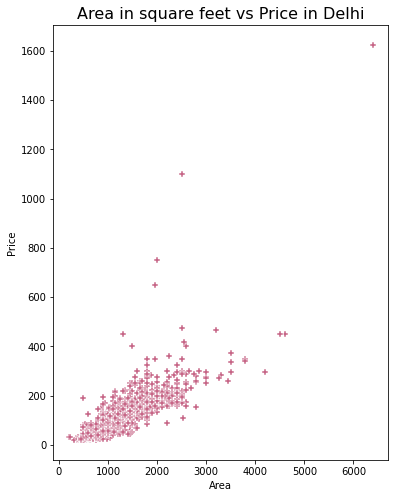

In [ ]:
scatter_plot(df2,'Delhi',custom_colors[1])

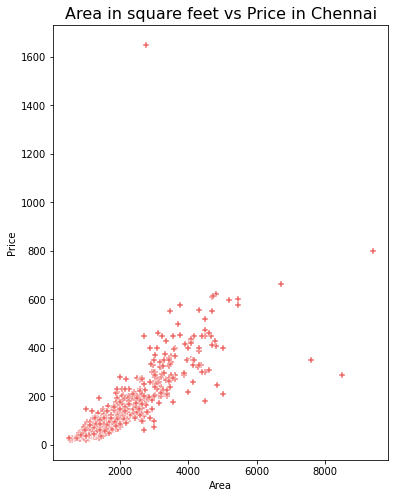

In [ ]:
scatter_plot(df3,'Chennai',custom_colors[2])

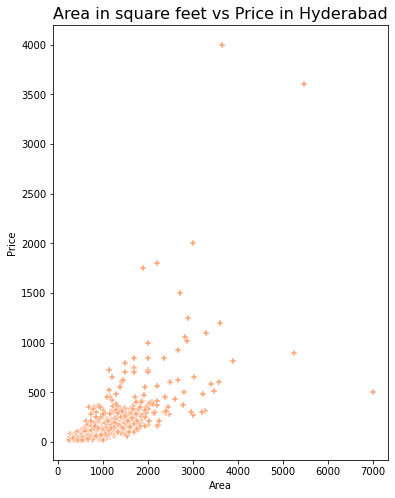

In [ ]:
scatter_plot(df4,'Hyderabad',custom_colors[3])

In [ ]:
df1 = df1.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
df1 = df1.dropna()

df2 = df2.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
df2 = df2.dropna()

df3 = df3.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
df3 = df3.dropna()

df4 = df4.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
df4 = df4.dropna()

In [ ]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'Latitude',
       'Longitude']

# Chennai
X1 = df1[feature_names]
y1 = df1['Price']

# Delhi
X2 = df2[feature_names]
y2 = df2['Price']

# Hyderabad
X3 = df3[feature_names]
y3 = df3['Price']

# Mumbai
X4 = df4[feature_names]
y4 = df4['Price']

In [ ]:
# Chennai
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=1)
# Delhi
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)
# Hyderabad
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=1)
# Mumbai
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state=1)

In [ ]:
#Chennai

model1 = RandomForestRegressor().fit(X_train1,y_train1)

In [ ]:
perm = PermutationImportance(model1, random_state=1).fit(X_train1,y_train1)
eli5.show_weights(perm, feature_names = X_train1.columns.tolist())

Weight,Feature
0.9349 ± 0.0350,Area
0.2521 ± 0.0238,Longitude
0.1064 ± 0.0030,No. of Bedrooms
0.0531 ± 0.0086,Latitude
0.0055 ± 0.0028,Sofa
0.0052 ± 0.0019,DiningTable
0.0047 ± 0.0011,BED
0.0031 ± 0.0007,Resale
0.0025 ± 0.0011,IndoorGames
0.0018 ± 0.0003,CarParking


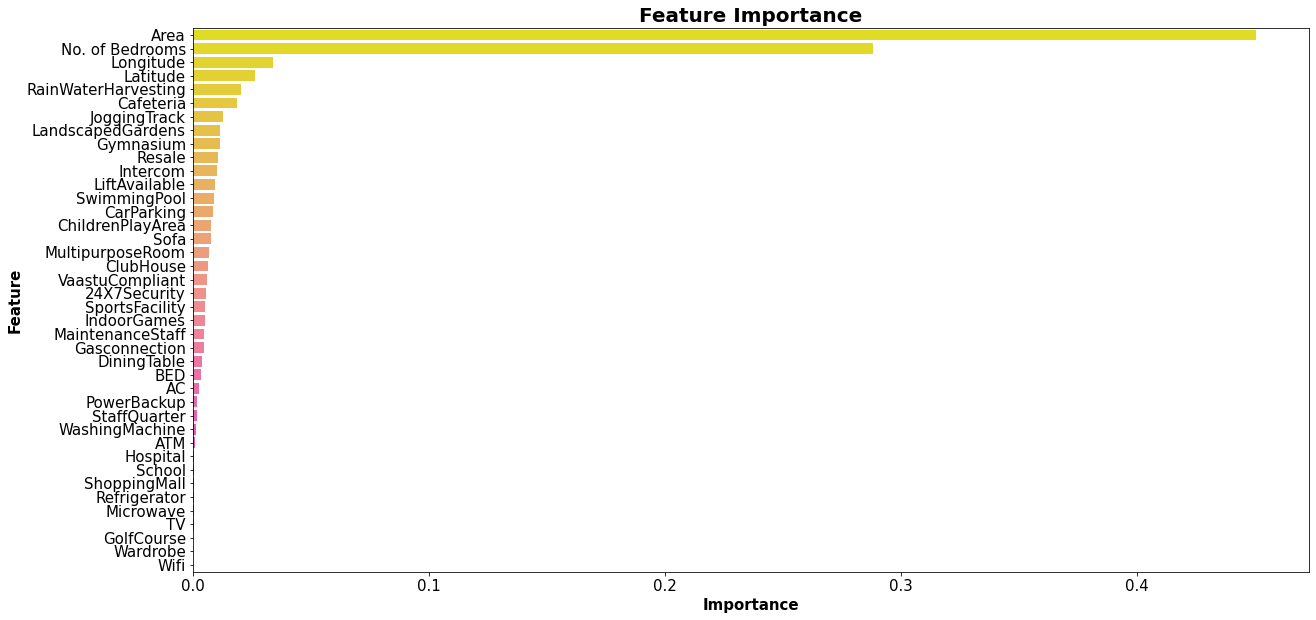

In [ ]:
#Chennai

model1 = ExtraTreesRegressor()
model1.fit(X_train1,y_train1)
fi = pd.DataFrame(model1.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [ ]:
#Chennai

feature_names5 = ['Area','No. of Bedrooms','Longitude', 'Latitude','RainWaterHarvesting','ClubHouse','24X7Security']

X5 = df1[feature_names5]
y5 = df1['Price']

train_X1, val_X1, train_y1, val_y1 = train_test_split(X5, y5, random_state=1)

In [ ]:
#Chennai

def train_model(m,name):
    model = m
    model.fit(X=train_X1, y=train_y1)
    predictions = model.predict(val_X1)
    mse1 = mean_squared_error(val_y1, predictions)
    rmse1 = math.sqrt(mse1)
    r2 = r2_score(val_y1, predictions)
    print("{0} rmse {1} r2 {2}".format(name,rmse1,r2))

train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   

Decision Tree Regressor rmse 26.680159172771702 r2 0.9360167439232292
Random Forest Regressor rmse 17.84414755233652 r2 0.9713792430010734
[17:33:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regressor rmse 17.706874121428292 r2 0.9718179030464597


In [ ]:
# Delhi

model2 = RandomForestRegressor().fit(X_train2,y_train2)

In [ ]:
perm = PermutationImportance(model2, random_state=1).fit(X_train2,y_train2)
eli5.show_weights(perm, feature_names = X_train2.columns.tolist())

Weight,Feature
1.2843 ± 0.1066,Area
0.2376 ± 0.0396,Longitude
0.0566 ± 0.0053,Latitude
0.0488 ± 0.0025,No. of Bedrooms
0.0089 ± 0.0016,Gasconnection
0.0082 ± 0.0029,Resale
0.0053 ± 0.0005,ChildrenPlayArea
0.0045 ± 0.0008,AC
0.0038 ± 0.0010,LiftAvailable
0.0034 ± 0.0014,MaintenanceStaff


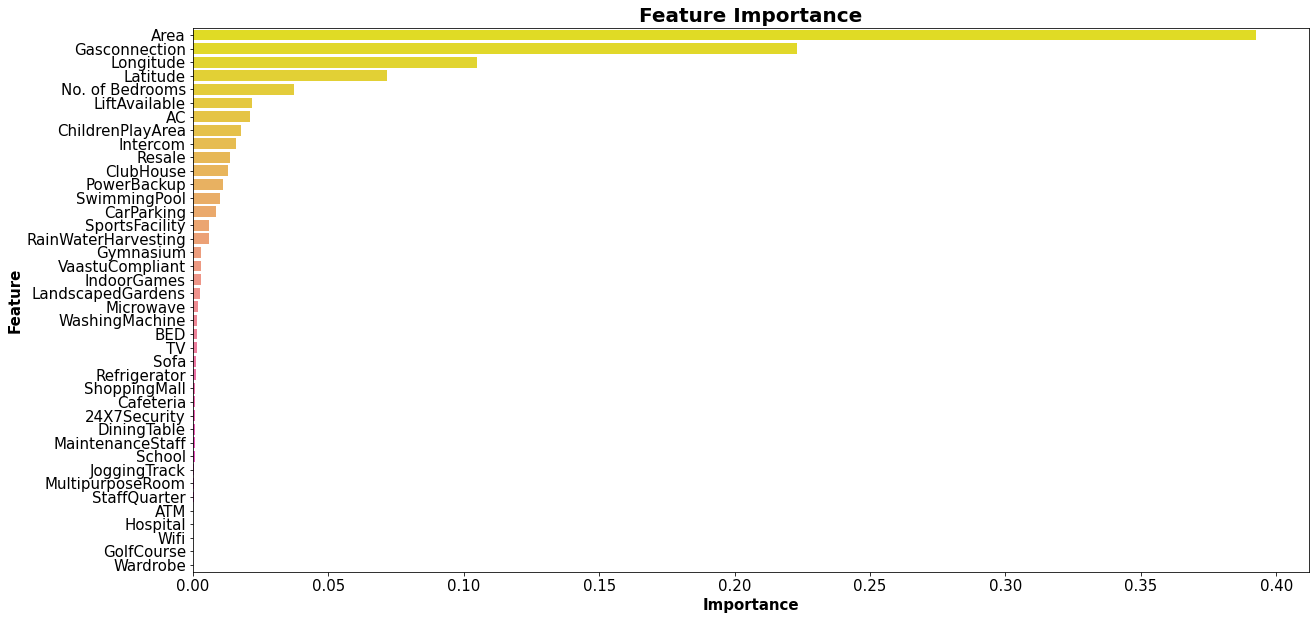

In [ ]:
# Delhi

model2 = ExtraTreesRegressor()
model2.fit(X_train2,y_train2)
fi = pd.DataFrame(model2.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [ ]:
#Delhi

feature_names6 = ['Area','Gasconnection','Longitude', 'Latitude', 'No. of Bedrooms','LiftAvailable','AC','ChildrenPlayArea','Resale',
                  'PowerBackup']

X6 = df2[feature_names6]
y6 = df2['Price']

train_X2, val_X2, train_y2, val_y2 = train_test_split(X6, y6, random_state=1)

In [ ]:
#Delhi

def train_model(m,name):
    model = m
    model.fit(X=train_X2, y=train_y2)
    predictions = model.predict(val_X2)
    mse2 = mean_squared_error(val_y2, predictions)
    rmse2 = math.sqrt(mse2)
    r2 = r2_score(val_y2, predictions)
    print("{0} rmse {1} r2 {2}".format(name,rmse2,r2))

train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   

Decision Tree Regressor rmse 36.922735557009766 r2 0.7860970396663104
Random Forest Regressor rmse 31.88461869587546 r2 0.8404886793462625
[17:33:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regressor rmse 31.449846187408316 r2 0.8448091517536611


In [ ]:
# Hyderabad

model3 = RandomForestRegressor().fit(X_train3,y_train3)

In [ ]:
perm = PermutationImportance(model3, random_state=1).fit(X_train3,y_train3)
eli5.show_weights(perm, feature_names = X_train3.columns.tolist())

Weight,Feature
1.4953 ± 0.1698,Area
0.0540 ± 0.0024,Latitude
0.0482 ± 0.0195,Longitude
0.0309 ± 0.0033,BED
0.0181 ± 0.0167,PowerBackup
0.0134 ± 0.0043,LiftAvailable
0.0130 ± 0.0031,Resale
0.0128 ± 0.0065,24X7Security
0.0072 ± 0.0143,ClubHouse
0.0057 ± 0.0004,ATM


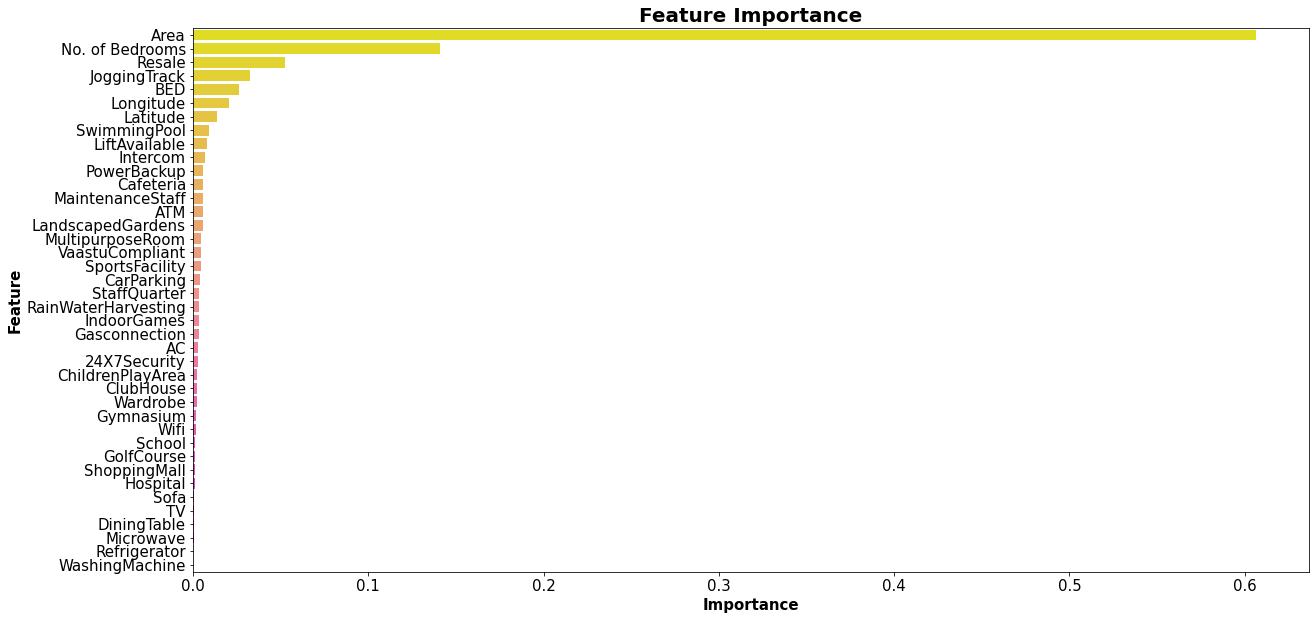

In [ ]:
# Hyderabad

model3 = ExtraTreesRegressor()
model3.fit(X_train3,y_train3)
fi = pd.DataFrame(model3.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [ ]:
#Hyderabad

feature_names7 = ['Area','No. of Bedrooms','Resale','JoggingTrack','Latitude','Longitude']

X7 = df3[feature_names7]
y7 = df3['Price']

train_X3, val_X3, train_y3, val_y3 = train_test_split(X7, y7, random_state=1)

In [ ]:
#Hyderabad

def train_model(m,name):
    model = m
    model.fit(X=train_X3, y=train_y3)
    predictions = model.predict(val_X3)
    mse3 = mean_squared_error(val_y3, predictions)
    rmse3 = math.sqrt(mse3)
    r2 = r2_score(val_y3, predictions)
    print("{0} rmse {1} r2 {2}".format(name,rmse3,r2))

train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   

Decision Tree Regressor rmse 75.31379813475125 r2 0.2669398483601182
Random Forest Regressor rmse 47.08142272491405 r2 0.7135230603877163
[17:34:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regressor rmse 34.05956675399997 r2 0.8500768318456711


In [ ]:
# Mumbai

model4 = RandomForestRegressor().fit(X_train4,y_train4)

In [ ]:
perm = PermutationImportance(model4, random_state=1).fit(X_train4,y_train4)
eli5.show_weights(perm, feature_names = X_train4.columns.tolist())

Weight,Feature
1.2892 ± 0.1065,Area
0.1923 ± 0.0236,Longitude
0.0394 ± 0.0108,Latitude
0.0181 ± 0.0011,No. of Bedrooms
0.0150 ± 0.0026,BED
0.0104 ± 0.0163,Intercom
0.0071 ± 0.0018,Sofa
0.0070 ± 0.0076,SportsFacility
0.0068 ± 0.0034,JoggingTrack
0.0058 ± 0.0012,Refrigerator


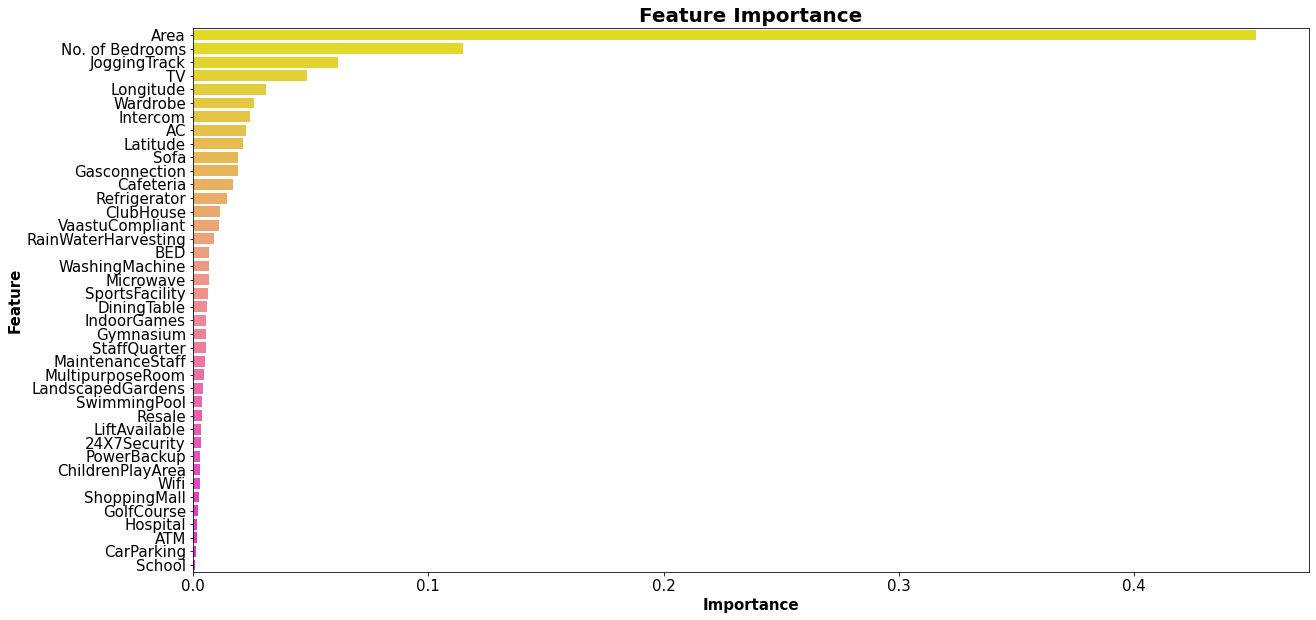

In [ ]:
# Mumbai

model4 = ExtraTreesRegressor()
model4.fit(X_train4,y_train4)
fi = pd.DataFrame(model4.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [ ]:
#Mumbai

feature_names8 = ['Area','No. of Bedrooms','Longitude', 'Latitude']

X8 = df4[feature_names8]
y8 = df4['Price']

train_X4, val_X4, train_y4, val_y4 = train_test_split(X8, y8, random_state=1)

In [ ]:
#Mumbai

def train_model(m,name):
    model = m
    model.fit(X=train_X4, y=train_y4)
    predictions = model.predict(val_X4)
    mse4 = mean_squared_error(val_y4, predictions)
    rmse4 = math.sqrt(mse4)
    r2 = r2_score(val_y4, predictions)
    print("{0} rmse {1} r2 {2}".format(name,rmse4,r2))

train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   

Decision Tree Regressor rmse 129.7899549288413 r2 0.6789439736306431
Random Forest Regressor rmse 102.21428357504176 r2 0.8008768100787043
[17:34:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regressor rmse 51.98032764310505 r2 0.9485036214955557
